In [1]:
#object detection using keras
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

In [2]:
model = MobileNetV2(weights='imagenet',
                    include_top=True) #fully connected dense layer at the top

14536120/14536120 [==============================] - 20s 1us/step


In [14]:
img_path = r"C:\Users\dasad\OneDrive\Desktop\cars.jpg"
img = image.load_img(img_path,target_size=(224,224))
img_arr = image.img_to_array(img)
# Add an extra dimension to make it compatible with the model
img_arr = np.expand_dims(img_arr, axis=0)
img_arr = tf.keras.applications.mobilenet_v2.preprocess_input(img_arr)
predictions = model.predict(img_arr)

1/1 [==============================] - 2s 2s/step


In [15]:
#decode the prediction for human understanding
decoded = tf.keras.applications.mobilenet_v2.decode_predictions(predictions , top=3)[0]

35363/35363 [==============================] - 0s 6us/step


1:cab (50.83%)
2:pickup (15.04%)
3:beach_wagon (11.16%)


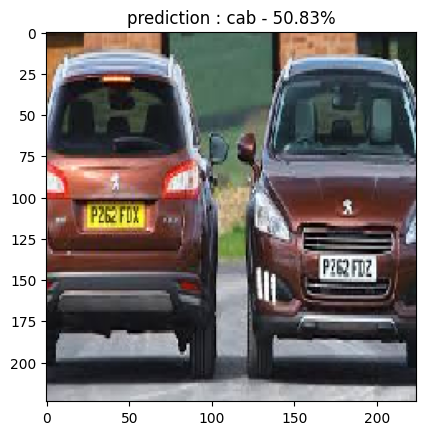

In [16]:
for i,(id,label,score) in enumerate(decoded):
    print(f"{i+1}:{label} ({score*100:.2f}%)")
plt.imshow(img)
plt.title(f"prediction : {decoded[0][1]} - {decoded[0][2]*100:.2f}%")
plt.show()